In [1]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq
from scipy import signal

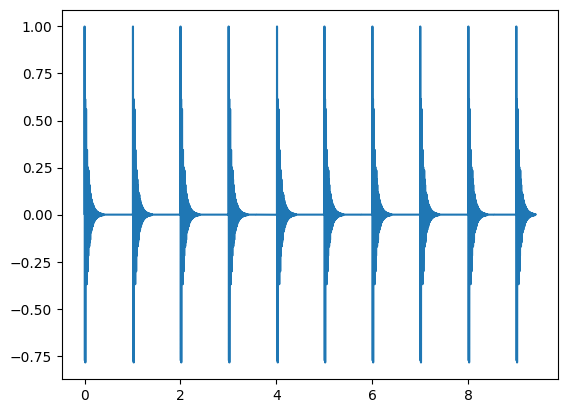

In [2]:
path = 'drum2.wav'
pluc_window = 100
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

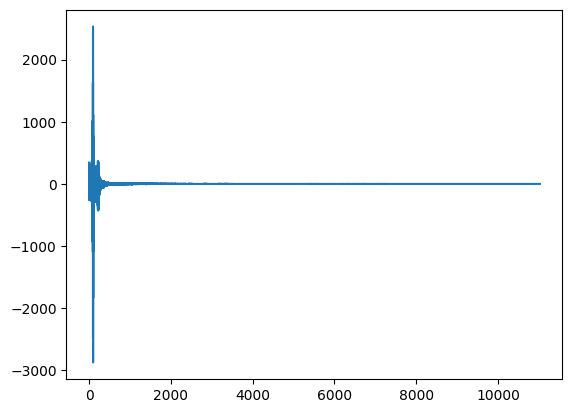

In [3]:
audio_fft = rfft(audio)
sample_period = 1/sample_rate
W=rfftfreq(audio.size,sample_period)
plt.plot(W,audio_fft)
plt.show

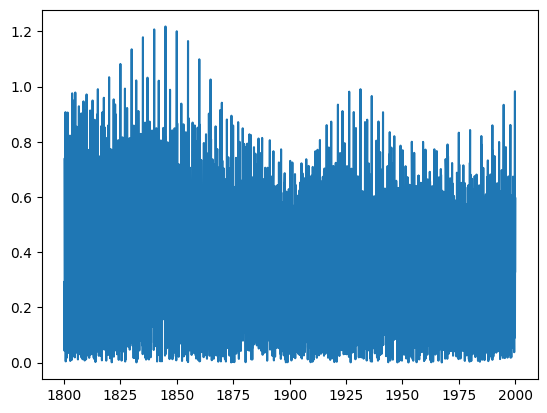

In [4]:
plt.plot(W[(W>1800)&(W<2000)],abs(audio_fft[(W>1800)&(W<2000)]))

In [5]:
def fft(audio, sample_rate):
    audio_fft = rfft(audio)
    W = rfftfreq(audio.size,1/sample_rate)
    return audio_fft, W


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=rfftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if audio_fft[i] > average:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i]-window > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i] > fig_a[-1]:
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W,audio_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(-2.0746637863277186, 197.92533621367227),
 (261.82401643336243, 461.82401643336243),
 (461.9276893477286, 661.9276893477286),
 (719.7658438734129, 919.7658438734129),
 (966.4398721206655, 1166.4398721206655),
 (20, 180),
 (150, 300)]

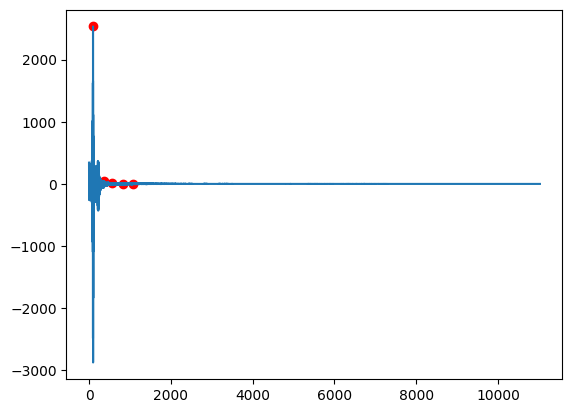

In [6]:
audio_fft, W = fft(audio,sample_rate)
ranges = get_ranges(audio_fft, W,sample_rate,pluc_window)
ranges.append((20,180))
ranges.append((150,300))
ranges

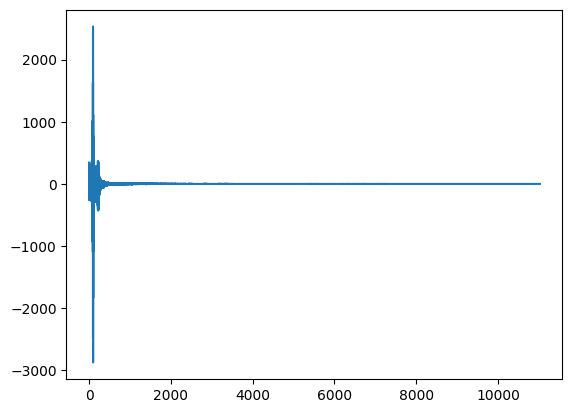

In [7]:
plt.plot(W,audio_fft)


In [8]:
print(ranges)
def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,window*2,len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-20*han/20) 
    plt.plot(W[W<400],cuttoff[W<400])
    return cuttoff


[(-2.0746637863277186, 197.92533621367227), (261.82401643336243, 461.82401643336243), (461.9276893477286, 661.9276893477286), (719.7658438734129, 919.7658438734129), (966.4398721206655, 1166.4398721206655), (20, 180), (150, 300)]


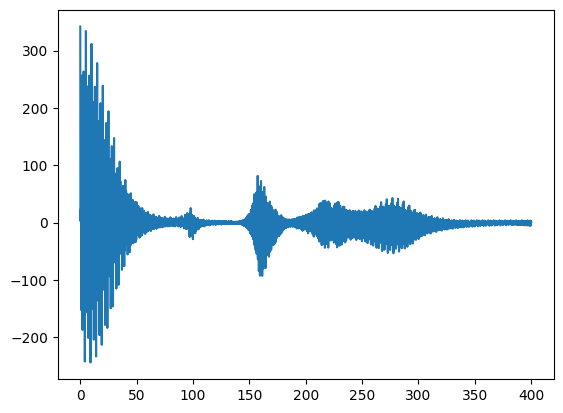

In [9]:

audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))

Audio(audio_final, rate = sample_rate)

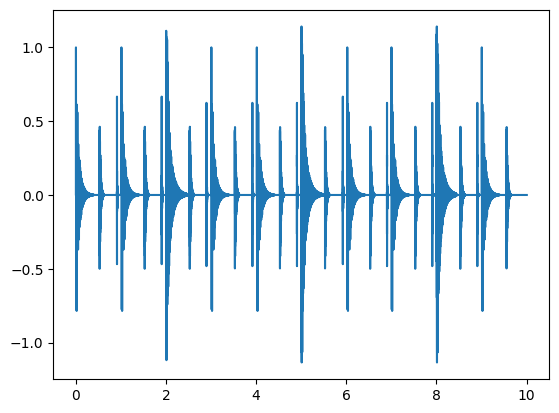

In [170]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)


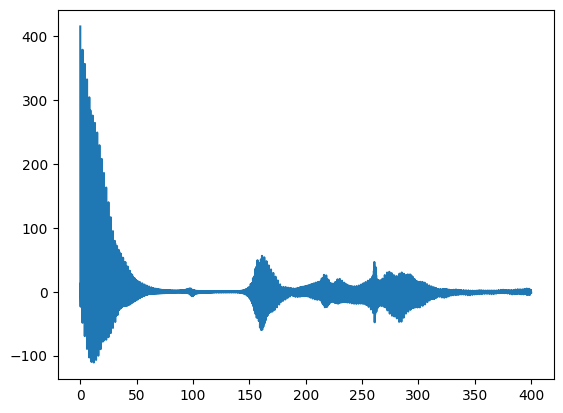

In [171]:
audio_fft, W = fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))
Audio(audio_final, rate = sample_rate)

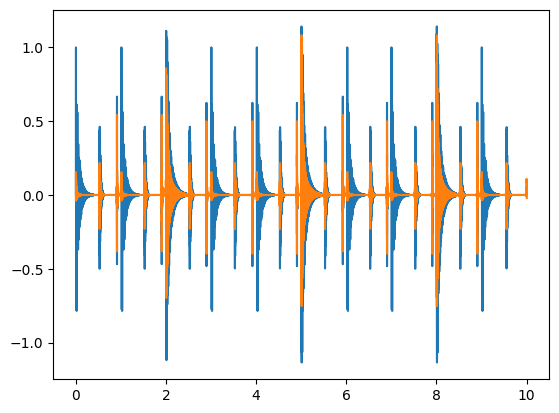

In [172]:
time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.plot(time,audio_final)